# Importe librerias

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np

from keras import regularizers

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Descargar DataSet

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


Diccionario de palabras

In [ ]:
word_index = imdb.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])


1654784/1641221 [==============================] - 0s 0us/step


One-hot encoding

In [ ]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults  

# Transformar datos

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Crear modelo

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

# Entrenamiento

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1474 - acc: 0.9522 - val_loss: 0.2805 - val_acc: 0.8875
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1229 - acc: 0.9600 - val_loss: 0.2906 - val_acc: 0.8873
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0983 - acc: 0.9710 - val_loss: 0.3126 - val_acc: 0.8850
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0836 - acc: 0.9761 - val_loss: 0.3314 - val_acc: 0.8791
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0703 - acc: 0.9804 - val_loss: 0.3573 - val_acc: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0550 - acc: 0.9867 - val_loss: 0.3769 - val_acc: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0456 - acc: 0.9893 - val_loss: 0.4039 - val_acc: 0.8748
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0385 - a

# Modelo más simple

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6251 - acc: 0.6485 - val_loss: 0.5232 - val_acc: 0.8059
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4409 - acc: 0.8736 - val_loss: 0.4053 - val_acc: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3429 - acc: 0.9025 - val_loss: 0.3470 - val_acc: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2819 - acc: 0.9172 - val_loss: 0.3132 - val_acc: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2395 - acc: 0.9269 - val_loss: 0.3092 - val_acc: 0.8794
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2083 - acc: 0.9383 - val_loss: 0.2856 - val_acc: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1840 - acc: 0.9457 - val_loss: 0.2753 - val_acc: 0.8898
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1645 - a

# Analizis resultados

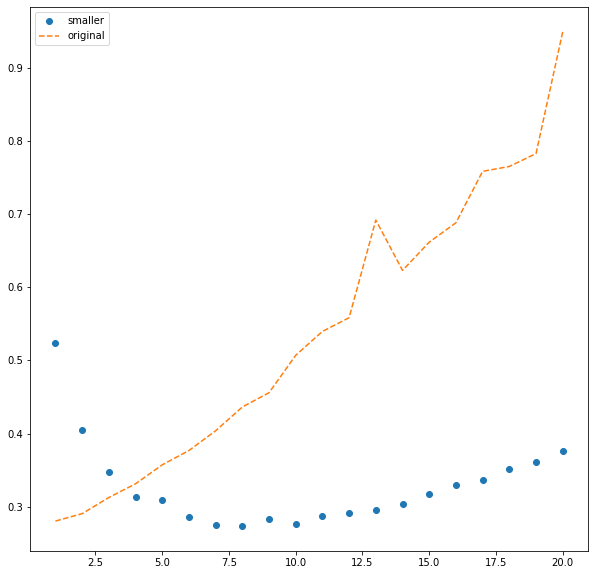

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

# Regularización

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5697 - acc: 0.7810 - val_loss: 0.4529 - val_acc: 0.8590
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3775 - acc: 0.8953 - val_loss: 0.3718 - val_acc: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3019 - acc: 0.9187 - val_loss: 0.3385 - val_acc: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2624 - acc: 0.9306 - val_loss: 0.3290 - val_acc: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2373 - acc: 0.9398 - val_loss: 0.3394 - val_acc: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2237 - acc: 0.9443 - val_loss: 0.3386 - val_acc: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2096 - acc: 0.9495 - val_loss: 0.3542 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1996 - a

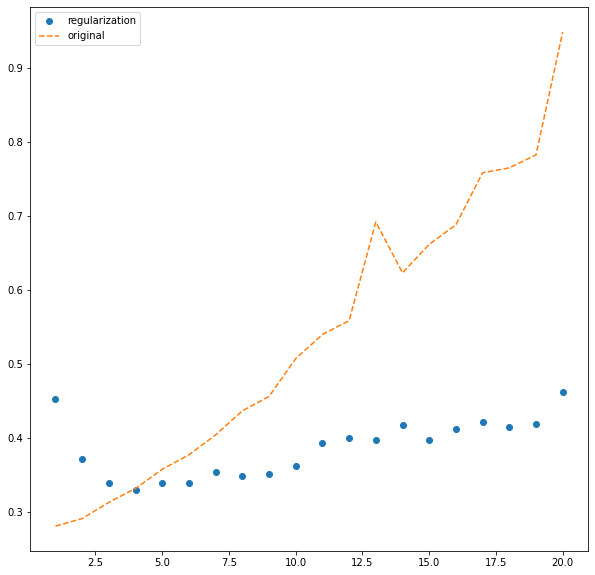

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

# Dropout

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6257 - acc: 0.6402 - val_loss: 0.5293 - val_acc: 0.7851
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5119 - acc: 0.7623 - val_loss: 0.4176 - val_acc: 0.8625
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4348 - acc: 0.8197 - val_loss: 0.3598 - val_acc: 0.8830
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3734 - acc: 0.8593 - val_loss: 0.3143 - val_acc: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3223 - acc: 0.8827 - val_loss: 0.2951 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2852 - acc: 0.9024 - val_loss: 0.2802 - val_acc: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2532 - acc: 0.9190 - val_loss: 0.2796 - val_acc: 0.8877
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2235 - a

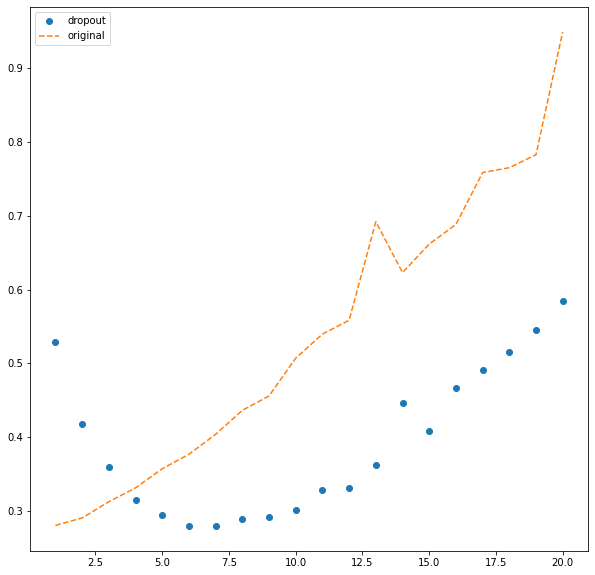

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

# Todas las tecnicas

In [ ]:
model5 = models.Sequential()
model5.add(layers.Dense(8, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history5 = model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.9394 - acc: 0.5997 - val_loss: 0.7304 - val_acc: 0.8172
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.7208 - acc: 0.6694 - val_loss: 0.6837 - val_acc: 0.8402
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6927 - acc: 0.6973 - val_loss: 0.6647 - val_acc: 0.8081
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6715 - acc: 0.7223 - val_loss: 0.6187 - val_acc: 0.8429
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6585 - acc: 0.7313 - val_loss: 0.6167 - val_acc: 0.8526
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6485 - acc: 0.7421 - val_loss: 0.5795 - val_acc: 0.8533
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6313 - acc: 0.7523 - val_loss: 0.5616 - val_acc: 0.8568
Epoch 8/20
30/30 [==============================] - 1s 50ms/step - loss: 0.6230 - a

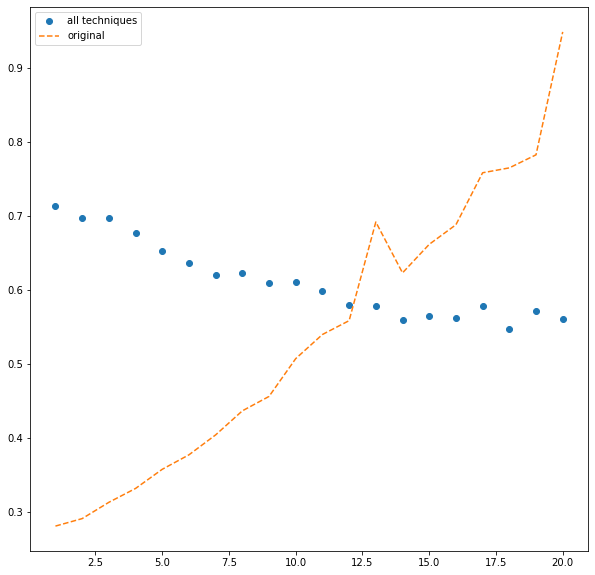

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values5 = history5.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values5, 'o',label='all techniques')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

# Predicciones

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     12500
         1.0       0.86      0.88      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



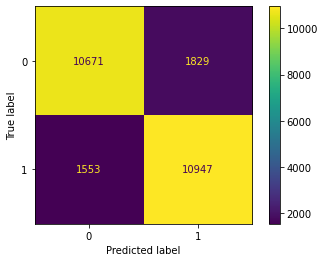

In [ ]:
predictions = model2.predict(x_test).flatten()
predictions = np.piecewise(predictions,[predictions<0.5, predictions>0.5],[0,1])

print(classification_report(y_test, predictions))
conf_mat = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()